# Times Higher Education University Rankings Unsupervised Machine Learning - Clustering

## 1. Importing libraries

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Importing the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
from sklearn.preprocessing import StandardScaler # Importing StandardScaler for standardizing data

In [20]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [21]:
# Set path variable

path = r'C:\Users\HP\Documents\CareerFoundry\Data Immersion\Achievement 6\World University Rankings Analysis'

In [22]:
# Import dataset

df_times = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'times_top200.csv'))

## 2. Data Cleaning, Manipulations, and Preprocessing

##### Removing irrelevant columns

In [23]:
# Drop index column

df_times = df_times.drop(columns = ['Unnamed: 0'])

In [24]:
df_times.dtypes

world_rank_Times                 int64
university_name                 object
country                         object
teaching_score                 float64
international_outlook_score    float64
research_score                 float64
citations_score                float64
income_score                   float64
overall_score_Times            float64
num_students                   float64
student_staff_ratio            float64
international_students         float64
female_male_ratio              float64
year                             int64
dtype: object

In [25]:
# Removing non numerical columns and other irrelveant columns

df_times = df_times.drop(columns = ['university_name', 'country'])

##### Missing values

In [26]:
# Check for missing values

df_times.isnull().sum()

world_rank_Times                 0
teaching_score                   0
international_outlook_score      9
research_score                   0
citations_score                  0
income_score                   140
overall_score_Times              0
num_students                    19
student_staff_ratio             19
international_students          20
female_male_ratio              123
year                             0
dtype: int64

Since there are multiple columns with missing values, these columns will be omitted in data analysis. Putting average or median values would be unfair since universities can have varying scores (some top universities can still have low scores in certain criteria). The Kmeans fitting further down below also does not work with NaN values. 

In [27]:
### Drop other columns

df_times = df_times.drop(columns = ['international_outlook_score', 'income_score', 'num_students', 'student_staff_ratio', 'international_students', 'female_male_ratio'])

df_times.isnull().sum()

world_rank_Times       0
teaching_score         0
research_score         0
citations_score        0
overall_score_Times    0
year                   0
dtype: int64

##### Duplicates check

In [28]:
# Create a dataframe with just duplicated values

dups = df_times.duplicated()

In [29]:
# Check size of duplicated dataframe

dups.shape 

(1201,)

No duplicates

##### Extreme values checks

In [30]:
df_times.describe()

,world_rank_Times,teaching_score,research_score,citations_score,overall_score_Times,year
count,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000
mean,100.233972,50.730808,52.252040,76.928726,59.846128,2013.501249
std,57.634735,16.912699,19.661541,15.535493,12.803446,1.708374
min,1.000000,15.900000,13.100000,8.600000,41.400000,2011.000000
25%,50.000000,38.300000,37.100000,66.700000,50.300000,2012.000000
50%,100.000000,47.500000,48.500000,78.800000,56.000000,2014.000000
75%,150.000000,60.200000,64.700000,89.200000,66.200000,2015.000000
max,200.000000,99.700000,99.400000,100.000000,96.100000,2016.000000


There don't appear to be any extreme values. 

##### Standardization?

## 3. Elbow technique

In [36]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [37]:
score = [kmeans[i].fit(df_times).score(df_times) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable 

[-5283091.923147378,
 -1754621.998465856,
 -993505.2118874835,
 -730333.895688114,
 -592861.3939076082,
 -515752.5045253943,
 -456317.2830561029,
 -405253.15697649267,
 -369220.6809343951]

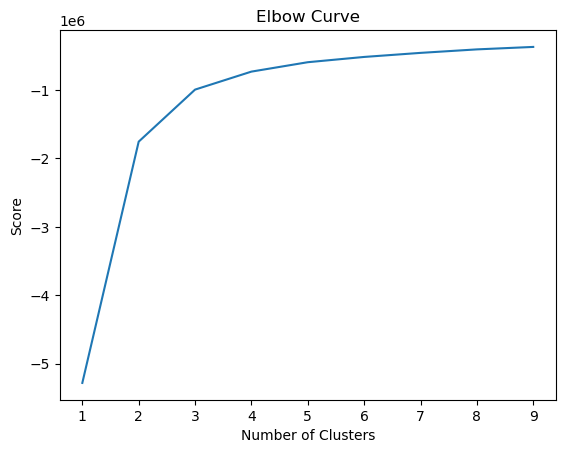

In [38]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

## 4. Choosing the number of clusters for the k-means algorithm. 

#####  The curve begins to flatten out around 3-4 range so the optimal number of clusters is 3. 

## 5. Run the k-means algorithm.

In [39]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [40]:
# Fit the k-means object to the data.

kmeans.fit(df_times)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


KMeans(n_clusters=3)

## 6. Attach a new column to the dataframe with the resulting clusters.

In [41]:
# Creating a new column with each cluster value for every row

df_times['clusters'] = kmeans.fit_predict(df_times)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


In [42]:
df_times.head()

,world_rank_Times,teaching_score,research_score,citations_score,overall_score_Times,year,clusters
0,1,99.7,98.7,98.8,96.1,2011,1
1,2,97.7,98.0,99.9,96.0,2011,1
2,3,97.8,91.4,99.9,95.6,2011,1
3,4,98.3,98.1,99.2,94.3,2011,1
4,5,90.9,95.4,99.9,94.2,2011,1


In [43]:
# Checking the value count of each cluster

df_times['clusters'].value_counts()

0    428
2    425
1    348
Name: clusters, dtype: int64

## 7. Create a few different visualizations using the clustered data to see the results in terms of the clusters

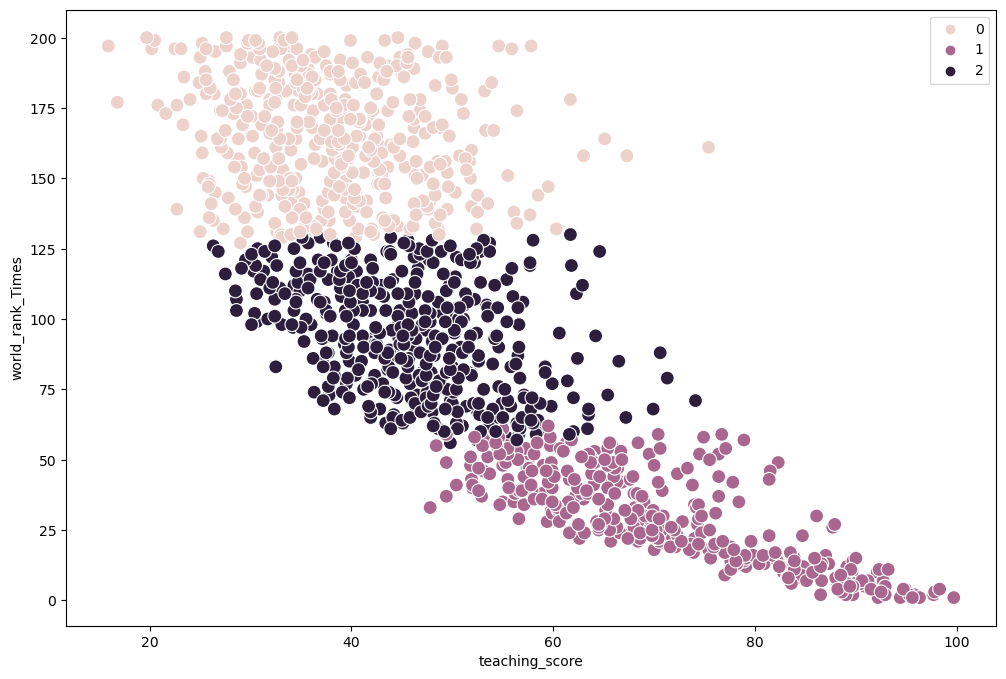

In [44]:
# Plot the clusters for the "teaching_score" and "world_rank_Times" variables based on prior data exploration. 

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x = df_times['teaching_score'], y = df_times['world_rank_Times'], hue = kmeans.labels_, s = 100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('teaching_score') # Label x-axis.
plt.ylabel('world_rank_Times') # Label y-axis.
plt.show()

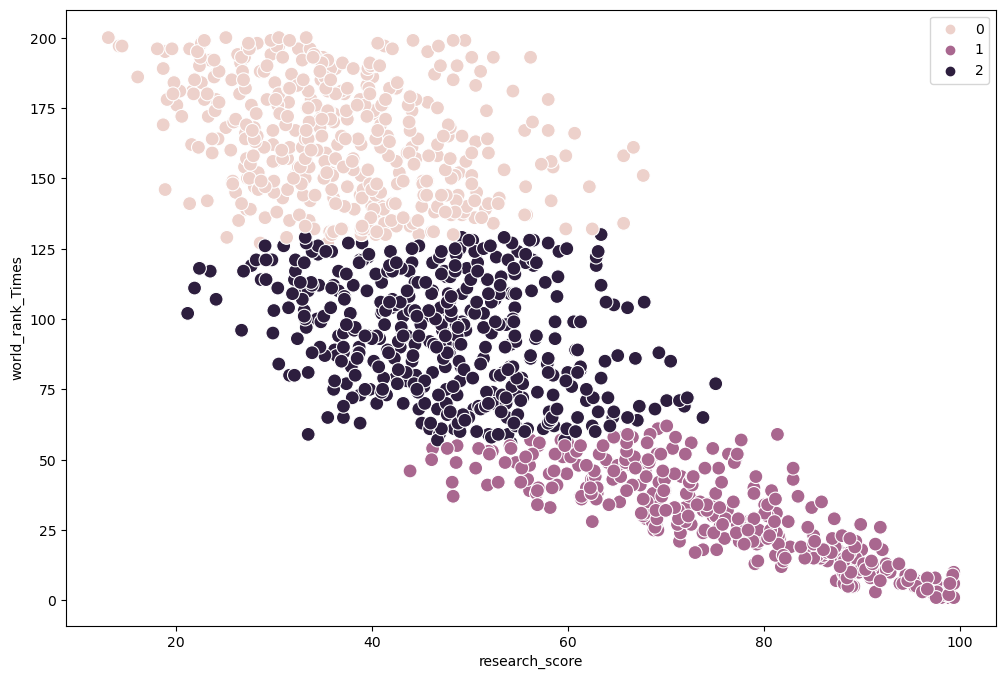

In [45]:
# Plot the clusters for the "research_score" and "world_rank_Times" variables based on prior data exploration. 

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x = df_times['research_score'], y = df_times['world_rank_Times'], hue = kmeans.labels_, s = 100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('research_score') # Label x-axis.
plt.ylabel('world_rank_Times') # Label y-axis.
plt.show()

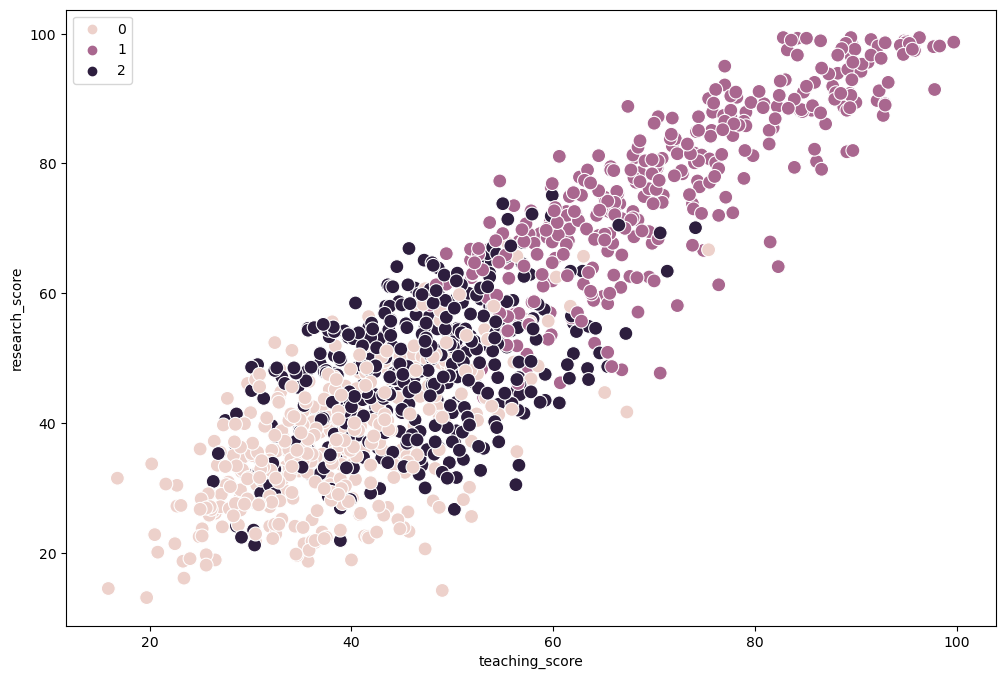

In [46]:
# Plot the clusters for the "teaching_score" and "research_score" variables based on prior data exploration. 

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x = df_times['teaching_score'], y = df_times['research_score'], hue = kmeans.labels_, s = 100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('teaching_score') # Label x-axis.
plt.ylabel('research_score') # Label y-axis.
plt.show()

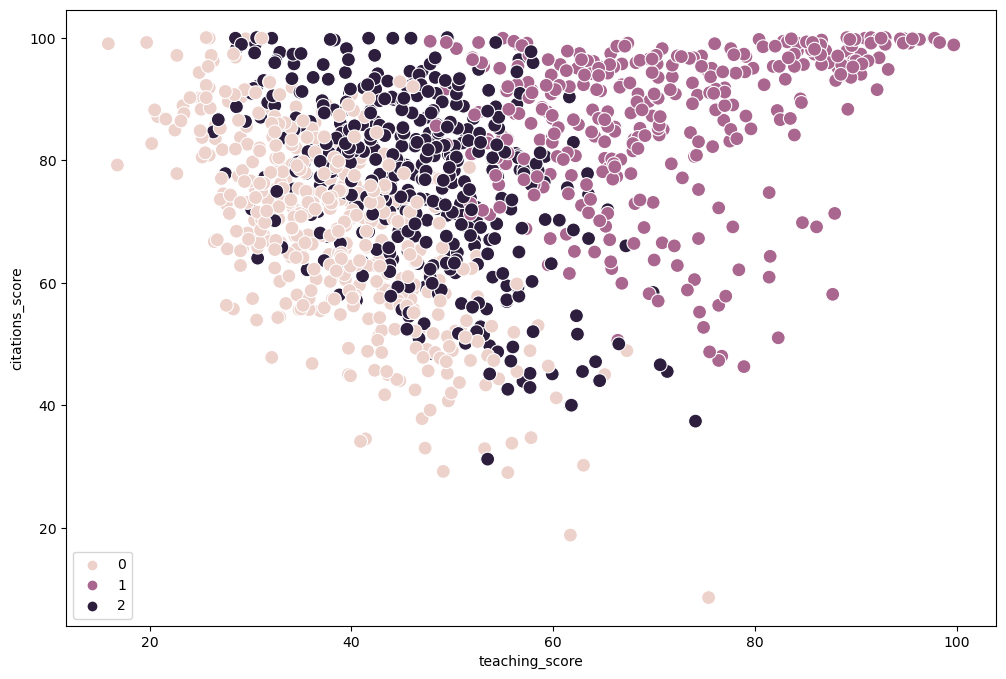

In [47]:
# Plot the clusters for the "teaching_score" and "citations_score" variables based on prior data exploration. 

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x = df_times['teaching_score'], y = df_times['citations_score'], hue = kmeans.labels_, s = 100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('teaching_score') # Label x-axis.
plt.ylabel('citations_score') # Label y-axis.
plt.show()

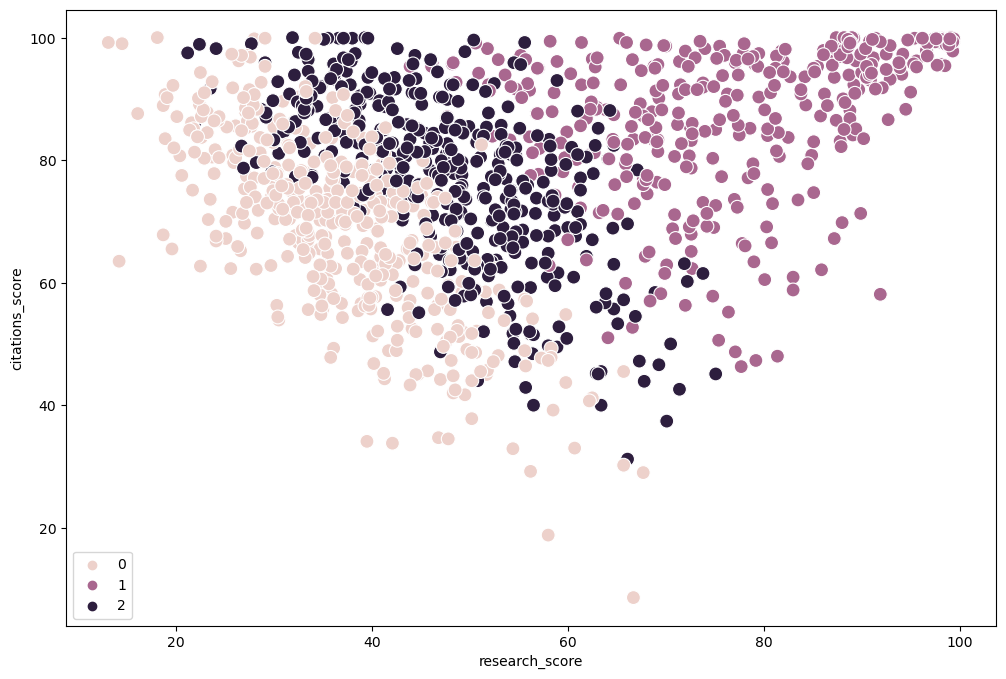

In [49]:
# Plot the clusters for the "research_score" and "citations_score" variables based on prior data exploration. 

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x = df_times['research_score'], y = df_times['citations_score'], hue = kmeans.labels_, s = 100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('research_score') # Label x-axis.
plt.ylabel('citations_score') # Label y-axis.
plt.show()

## 8. Discuss how and why the clusters make sense. If they don't make sense, explain why you'll need to explore the data further.

Compared to the CWUR dataset, the clusters here make much more sense. Even though the amount of datapoints is roughly the same, the combination of the smaller number of clusters and having less variation in data make the clusters group much more cleanly. 

In general, the clusters are grouped into 3 tiers of universities: top universities (cluster 1/pink), middle universities (cluster 2/black), and bottom universities (cluster 0/pale). In general, the top universities have consistent high scores in the 3 available categories (teaching, research, and citation scores) whereas the bottom universities tend to have lower scores. 

One interesting thing to note is that there are many universities that may have a high score in one factor (ex: citation score) but a low score in another factor (ex: teaching score). In general, the top universities never have a score below 40 in any of these factors. Middle universities have some outliers with these score but generally don't have scores below 40 as well. 

It would be interesting to see how the clusters look for the other deleted factors such as international outlook and income scores but unfortunately the missing values do not allow the object to be used with the kmeans algorithm. 

## 9. Calculate the descriptive statistics for your clusters using the groupby() function and discuss your finds.

In [50]:
df_times.groupby('clusters').agg({'world_rank_Times':['mean', 'median'], 
                            'teaching_score':['mean', 'median'], 
                            'research_score':['mean', 'median'],
                            'citations_score':['mean', 'median']})

world_rank_Times        teaching_score        research_score         \
                     mean median           mean median           mean median   
clusters                                                                       
0              164.471963  164.0      38.247664   37.9      36.980607  36.05   
1               29.431034   29.0      71.577874   69.8      76.625000  76.95   
2               93.517647   94.0      46.232000   46.3      47.674118  47.90   

         citations_score         
                    mean median  
clusters                         
0              68.878738  70.40  
1              86.897126  90.85  
2              76.873176  78.80

As stated in step 8, cluster 1 (pink) has the best overall world rankings and also the highest average score for all factors. Cluster 2 (black) is composed of middle universities and cluster 0 (pale) has the worst average world rankings. Despite the large difference in world rankings, the different in means and medians for each factor between clusters 0 and 2 is not very large, only different by around 7-8 points. 

The statistics for these clusters are much more controlled due to less variation in the data compared to the CWUR dataset. The clusters also have a significant sample size and are also generally the same size so the kmeans algorithm was useful for this dataset. 

## 10. Propose what these results could be useful for in future steps of an analytics pipeline. 

By assigning each of these universities a cluster number, it could still be possible to view how the other factors affect each other using a scatterplot. It would be possible to split the current dataframe into just the cluster column and another key column and then merge that dataframe with the original dataframe at the start of the notebook. New conclusions could possibly be drawn such as "top universities may have also have a general higher student body count" or "bottom universities tend to have lower international outlook scores" since clustering helps to visualize the data via categorizing. 

Due to the large size of each cluster, these datapoints could be used to predict values for certain factors as well such as teaching scores or scores for missing factors such as income score if the dataframe were merged correctly. 